# **Customer Churn Prediction using Machine Learning**
by Muhammad Alvendra Ihza

## **Import libraries and dataset**

In [1]:
#Importing general packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report 
import pickle
from pathlib import Path

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import dataset
df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco_final.csv')

In [3]:
#display the number of rows and columns
print(df_load.shape)

(6950, 13)


In [4]:
#display top 5 data
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [5]:
#display the number of unique ID
print(df_load.customerID.nunique())

6950


## **Exploratory Data Analysis**

Exploratory Data Analysis is an approach to analysing data to summarise their main characteristics, often with visual methods. Exploratory Data Analysis is majorly performed using the following methods:

- Univariate analysis — provides summary statistics for each field in the raw data set or summary only on one variable.
- Bivariate analysis — is performed to find the relationship between each variable in the dataset and the target variable of interest or using 2 variables and finding realtionship between them.
- Multivariate analysis — is performed to understand interactions between different fields in the dataset or finding interactions between variables more than 2.

In [6]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

**Exploratory Data Analysis (EDA) for Percentage of Churn with Univariate Analysis**

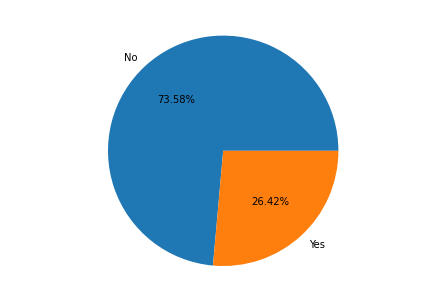

In [7]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels = labels,autopct='%1.2f%%')
plt.show()

From the above pie chart we can say that percentage of people who did `Churn` is 26.42% and `No Churn` is 73.58%. 

**Exploratory Data Analysis (EDA) for Numeric Variable with Bivariat Analysis**

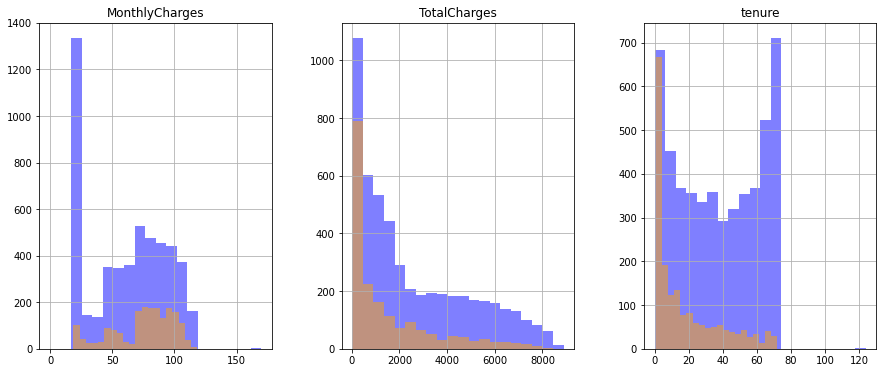

In [8]:
from matplotlib import pyplot as plt
import numpy as np

#creating bin in chart
numerical_features =  ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

From the above graph, we can say that for `MonthlyCharges` there is a tendency that the smaller monthly charges, the smaller the tendency to `Churn`. For `TotalCharges` there is no tendency toward `Churn`. For `tenure` there is a tendency that the longer the customer subscribes, the smaller the tendency to `Churn`.

**Exploratory Data Analysis (EDA) for Categorical Variable with Bivariat Analysis**

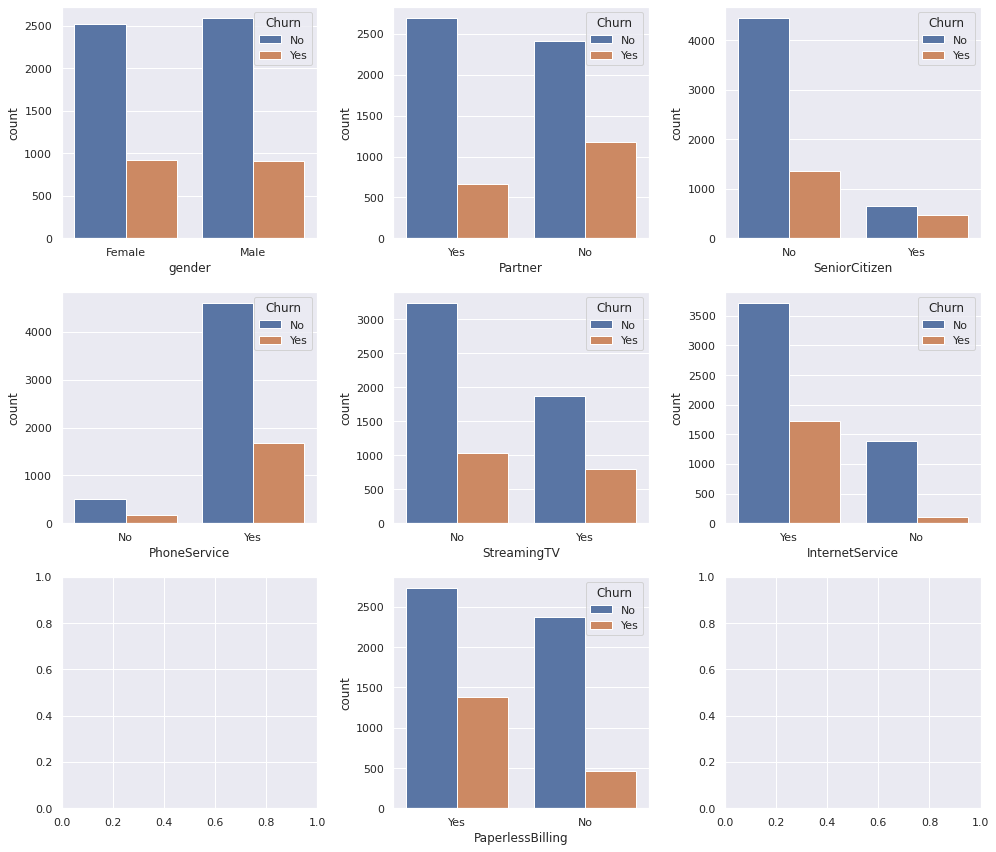

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

From the above graph, we know that `gender` didn't affect to `Churn`. But there is a tendency that people who did `Churn` are people who didn't have partners (` partner: No`), people with status not senior citizens (`SeniorCitizen: No`), people who have services telephone (`PhoneService: Yes`), people who didn't have streaming TV services (` StreamingTV: No`), people who have Internet services (`internetService: Yes`) and people with paperless billing (` PaperlessBilling : Yes`).

### **Data PreProcessing**

**Remove the unnecessary columns**

After further analysis, there are unnecessary columns for modelling, that is the customer ID Number (`customerID`) & the data collection period (UpdatedAt), so we can remove it.

In [10]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


**Encoding Data**

Categorical data are variables that contain label values such as 'Yes' & 'No' and 'Female' & 'Male'.  These label cannot be used in mathematical equations of the model, so we need to encode these variables into numbers.

In [11]:
from sklearn.preprocessing import LabelEncoder

#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number: continue
  # Perform encoding for each non-numeric column
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

cleaned_df.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


**Splitting the Dataset**

We make two partitions of dataset one for training the model called training set and other for testing the performance of the trained model called test set. The split is 70/30.

In [12]:
from sklearn.model_selection import train_test_split

# Predictor dan target
x = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('The number of rows and columns of x_train is:', x_train.shape,', and the number of rows and columns of y_train is:', y_train.shape)
print('\nChurn percentage in training set is:')
print(y_train.value_counts(normalize=True))
print('\The number of rows and columns of x_test is:', x_test.shape,', and the number of rows and columns of y_test is:', y_test.shape)
print('\nChurn percentage in test set is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train is: (4865, 10) , and the number of rows and columns of y_train is: (4865,)

Churn percentage in training set is:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
\The number of rows and columns of x_test is: (2085, 10) , and the number of rows and columns of y_test is: (2085,)

Churn percentage in test set is:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


After splitting the dataset, we can see that the number of rows and columns for each set is fit, and the churn percentage is fit with the data before, that means we splitting data properly.

## **Modelling: Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)
print(log_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Training set - Logistic Regression**

Classification Report Training Model (Logistic Regression) :

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.49      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.80      0.79      4865



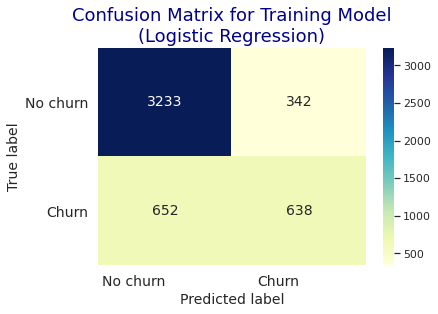

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Predict
y_train_pred = log_model.predict(x_train)

# Print classification report 
print('Classification Report Training Model (Logistic Regression) :\n')
print(classification_report(y_train, y_train_pred))

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Test set - Logistic Regression**

Classification Report Testing Model (Logistic Regression):

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



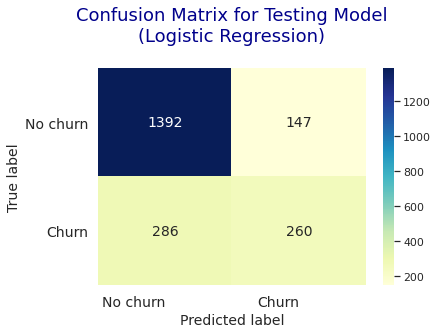

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Predict
y_test_pred = log_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Logistic Regression):\n')
print(classification_report(y_test, y_test_pred))

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

From the above analysis, we know:
- If we use the logistic regression algorithm by calling `LogisticRegression ()` from the sklearn without adding any parameters, the resulting model is the default setting of the sklearn, for details can be seen in the documentation.
- From the training set, we can see that the model can predict data by 80% accuracy, with predicted churn  that actually true churn is 638, predicted no churn that actually not churn is 3233, predicted not churn that actually true churn is 652 ,and predicted churn that actually not churn is 342.
- From the test set, we can see that the model can predict data by 79% accuracy, with predicted churn  that actually true churn is 260, predicted no churn that actually not churn is 1392, predicted not churn that actually true churn is 286 ,and predicted churn that actually not churn is 147.

## **Modelling: Random Forest Classifier**


In [16]:
from sklearn.ensemble import RandomForestClassifier

#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**Training set - Random Forest Classifier**

Classification Report Training Model (Random Forest) :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



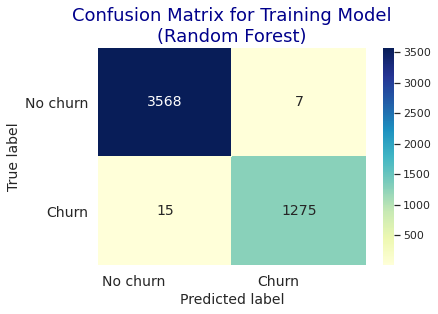

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Predict
y_train_pred = rdf_model.predict(x_train)

# Print Classification Report
print('Classification Report Training Model (Random Forest) :\n')
print(classification_report(y_train, y_train_pred))

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Test set - Random Forest Classifier**

Classification Report Testing Model (Random Forest Classifier):

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.59      0.47      0.52       546

    accuracy                           0.77      2085
   macro avg       0.70      0.68      0.69      2085
weighted avg       0.76      0.77      0.77      2085



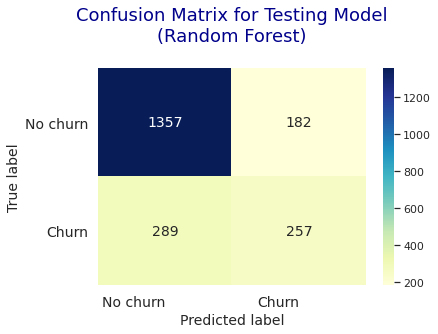

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Predict
y_test_pred = rdf_model .predict(x_test)

# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):\n')
print(classification_report(y_test, y_test_pred))

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

From the above analysis, we know:

- If we use the random forest classifier algorithm by calling `RandomForestClassifier()` from the sklearn without adding any parameters, the resulting model is the default setting of the sklearn, for details can be seen in the documentation.
- From the training set, we can see that the model can predict data by 100% accuracy, with predicted churn that actually true churn is 1274, predicted no churn that actually not churn is 3570, predicted not churn that actually true churn is 16 ,and predicted churn that actually not churn is 5.
- From the test set, we can see that the model can predict data by 77% accuracy, with predicted churn that actually true churn is 260, predicted no churn that actually not churn is 1349, predicted not churn that actually true churn is 286 ,and predicted churn that actually not churn is 190.

## **Modelling: Gradient Boosting Classifier**

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


**Training Set - Gradient Boosting Classifier**

Classification Report Training Model (Gradient Boosting):

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



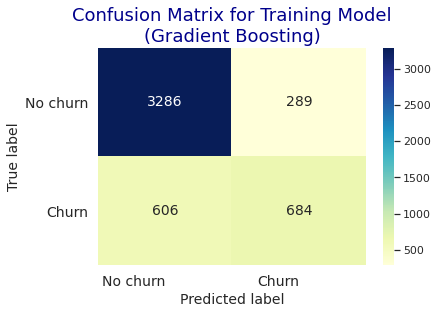

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Predict
y_train_pred = gbt_model.predict(x_train)

# Print classification report
print('Classification Report Training Model (Gradient Boosting):\n')
print(classification_report(y_train, y_train_pred))

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Test set - Gradient Boosting Classifier**

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



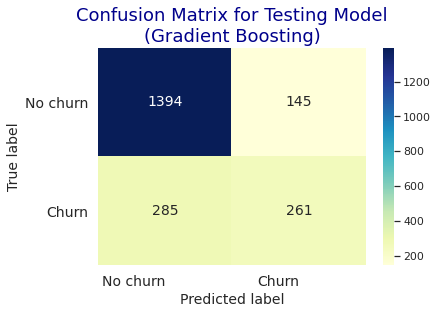

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Predict
y_test_pred = gbt_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

From the above analysis, we know:

- If we use the random forest classifier algorithm by calling `GradientBoostingClassifier()` from the sklearn without adding any parameters, the resulting model is the default setting of the sklearn, for details can be seen in the documentation.
- From the training set, we can see that the model can predict data by 82% accuracy, with predicted churn that actually true churn is 684, predicted no churn that actually not churn is 3286, predicted not churn that actually true churn is 606 ,and predicted churn that actually not churn is 289.
- From the test set, we can see that the model can predict data by 79% accuracy, with predicted churn that actually true churn is 261, predicted no churn that actually not churn is 1394, predicted not churn that actually true churn is 285 ,and predicted churn that actually not churn is 145.

## **The Best Model**

A good model is a model that can show a good performance in the training set and testing set.
- Over-fitting is a condition where the model fits the training set but has poor fit the testing set
- Under-fitting is a condition where the model has poor fit the training set but fits the testing set
- Appropriate-Fitting is a condition where the model fits the training set and testing set

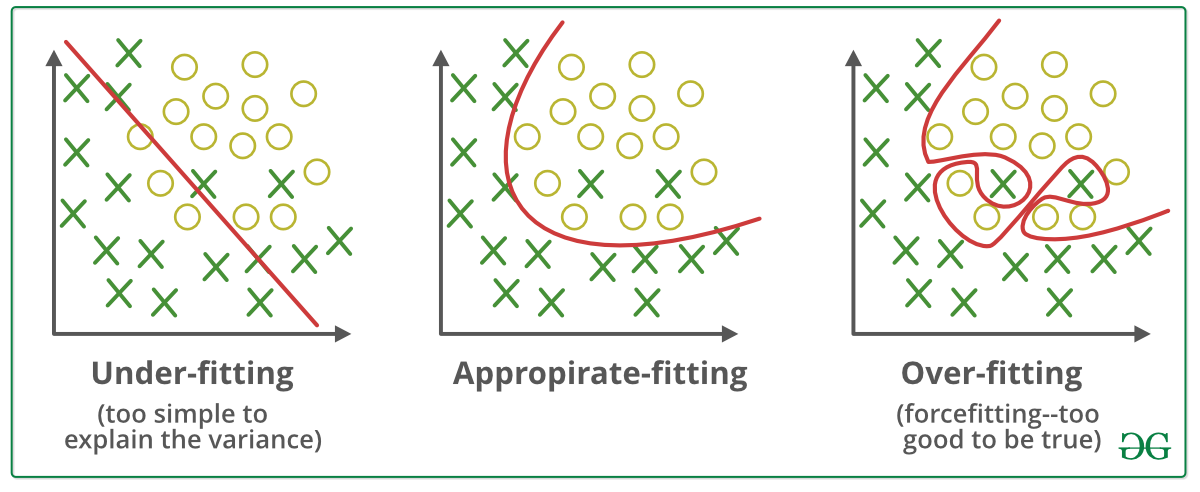

In [22]:
print(log_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## **Conclusion**

Based on the modelling that has been done using Logistic Regression, Random Forest and Extreme Gradiant Boost, we can conclude that to predict the churn of customers by using this dataset, the best model is using Logistic Regression algorithm, because the performance of the Logistic Regression model can predict equally well in the training and testing set (80% training accuracy, 79% testing accuracy), performance the other algorithm tends to Over-Fitting.